In [1]:
#read the data
import numpy as np
import pandas as pd

image_tags_train = pd.read_csv('image_tags_train.csv',header=None)[1].fillna(value='')
questions_train = pd.read_csv('questions_train.csv',header=None)[1].fillna(value='')
y_train = pd.read_csv('y_train.csv',header=None)[1].fillna(value='')

image_tags_val = pd.read_csv('image_tags_val.csv',header=None)[1].fillna(value='')
questions_val = pd.read_csv('questions_val.csv',header=None)[1].fillna(value='')
y_val = pd.read_csv('y_val.csv',header=None)[1].fillna(value='')

image_tags_test = pd.read_csv('image_tags_test.csv',header=None)[1].fillna(value='')
questions_test = pd.read_csv('questions_test.csv',header=None)[1].fillna(value='')


In [2]:
from sklearn.feature_extraction.text import CountVectorizer

def one_hot_transform(text_data):
    count = CountVectorizer()
    data = text_data
    bag = count.fit_transform(data).toarray() # create vocabulary
    return bag

In [3]:
#Get X_train,X_val,X_test
image_tags_train = pd.DataFrame(image_tags_train)
questions_train = pd.DataFrame(questions_train)
#X_train = pd.concat([image_tags_train_bag,questions_train_bag],axis=1)

image_tags_val = pd.DataFrame(image_tags_val)
questions_val = pd.DataFrame(questions_val)
#X_val = pd.concat([image_tags_val_bag,questions_val_bag],axis=1)

image_tags_test = pd.DataFrame(image_tags_test)
questions_test = pd.DataFrame(questions_test)
#X_test = pd.concat([image_tags_test_bag,questions_test_bag],axis=1)

In [4]:
#One-hot encoding with Bag of Words
image_tags_tobeTransformed = pd.concat([image_tags_train,image_tags_val,image_tags_test],axis=0)
image_tags_tobeTransformed = np.array(image_tags_tobeTransformed)
image_tags_transformed = one_hot_transform(image_tags_tobeTransformed.ravel())
image_tags_transformed = pd.DataFrame(image_tags_transformed)
questions_tobeTransformed = pd.concat([questions_train,questions_val,questions_test],axis=0)
questions_tobeTransformed = np.array(questions_tobeTransformed)
questions_transformed = one_hot_transform(questions_tobeTransformed.ravel())
questions_transformed = pd.DataFrame(questions_transformed)

In [5]:
#Split training/validation/test data
X = pd.concat([image_tags_transformed,questions_transformed],axis=1)
X_train = X[:4000]
X_val = X[4000:4800]
X_test = X[4800:4900]

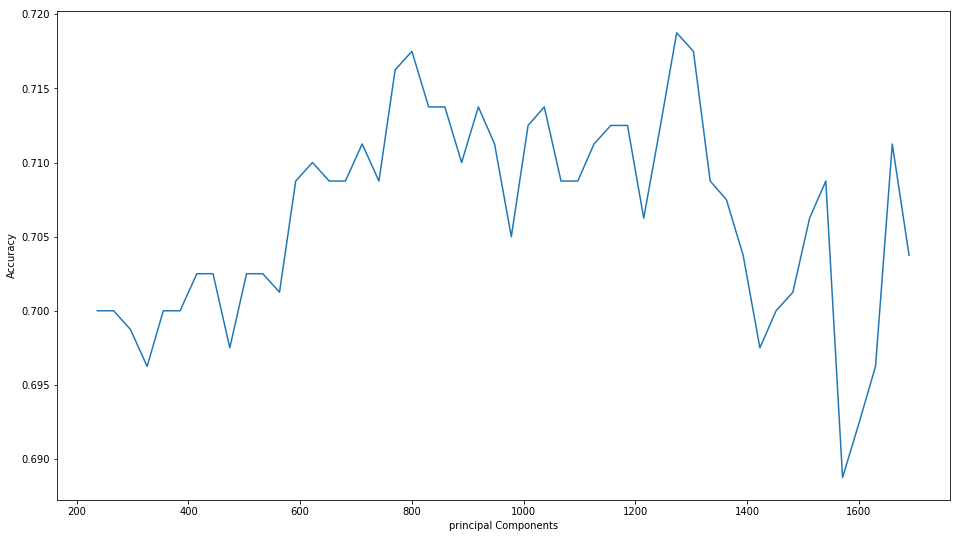

Wall time: 1min 46s


In [48]:
%%time
#Dimension Reduction
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


%matplotlib inline


accuracy = []
pc = []
plt.figure(figsize=(16,9))
for i in range(50):
    pca = PCA(n_components=int((i/100+0.01)*X_train.shape[1])).fit(X_train)
    X_train_reduced = pca.transform(X_train)
    X_val_reduced = pca.transform(X_val)
    model = LogisticRegression()
    model.fit(X_train_reduced,y_train)
    y_pred = model.predict(X_val_reduced)
    accuracy.append(accuracy_score(y_pred,y_val))
    pc.append(int((0.95 - i/60)*X_train.shape[1]))

plt.plot(pc,accuracy)
plt.ylabel("Accuracy")
plt.xlabel("principal Components")
plt.show()

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=1280).fit(X_train)
X_train_reduced = pca.transform(X_train)
X_val_reduced = pca.transform(X_val)

log1 = LogisticRegression(penalty='l1',class_weight={0:0.3, 1:0.7})
log2 = LogisticRegression(penalty='l2',class_weight={0:0.3, 1:0.7})
log3 = LogisticRegression(penalty='l1')
log4 = LogisticRegression(penalty='l2')
for model in [log1,log2,log3,log4]:
    model.fit(X_train_reduced,y_train)
    y_pred = model.predict(X_val_reduced)
    print((accuracy_score(y_pred,y_val)))

0.705
0.71
0.70625
0.69375


In [10]:
#ensemble learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
pca = PCA(n_components=1280).fit(X_train)
X_train_reduced = pca.transform(X_train)
X_val_reduced = pca.transform(X_val)

log = LogisticRegression(penalty='l2',class_weight={0:0.3, 1:0.7})
bagging = BaggingClassifier(log,max_samples=50,n_estimators =10)
adabooster = AdaBoostClassifier(log,n_estimators =20)

for model in [log,bagging,adabooster]:
    model.fit(X_train_reduced,y_train)
    y_pred = model.predict(X_val_reduced)
    print((accuracy_score(y_pred,y_val)))

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.71
0.705
0.705


In [13]:
log2.fit(X_train_reduced,y_train)
y_test_pred = log3.predict(X_test_reduced)
y_test_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [14]:
result = pd.DataFrame(y_test_pred)

In [15]:
result.to_csv('y_test.csv',index=False,header=False)